In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
data =np.loadtxt('ex1data1.txt',delimiter=',')
print data.shape

(97, 2)


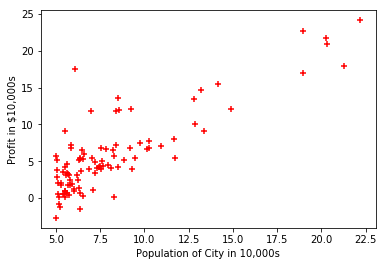

In [4]:
X = np.c_[np.ones(data.shape[0]),data[:,0]]
Y = np.c_[data[:,1]]
plt.scatter(X[:,1],Y,s=30,c='r',marker='+',linewidths=1)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


In [5]:
def ComputeLoss(X,Y,theta=[[0],[0]],Lambda=0):
    n = Y.size
    regulazation = Lambda*1.0/(2*n)*np.sum(np.square(theta[1]))     #正则项 r = 1/2n × theta**2
    J = 1.0/(2*n)*np.sum(np.square(X.dot(theta)-Y))+regulazation    #loss项
    return J

In [6]:
ComputeLoss(X,Y)

32.072733877455676

In [7]:
def GradientDescent(X,Y,theta=[[0],[0]],LearningRate = 0.01,num_iters = 1500,Lambda=0):
    n = Y.size
    Loss_history = np.zeros(num_iters)
    for i in range(num_iters):
        Loss_history[i] = ComputeLoss(X,Y,theta,Lambda)
        deltaTheta = (1.0/n)*(X.T.dot(X.dot(theta)-Y))+(Lambda*1.0/n)*np.c_[[0],theta[1]].reshape(2,1)
        theta = theta-LearningRate*deltaTheta
    return theta,Loss_history

theta [-3.63029144  1.16636235]


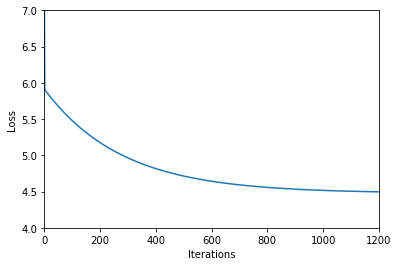

In [8]:
theta,LossHis = GradientDescent(X,Y)
print "theta",theta.ravel()
plt.xlim(0,1200)
plt.ylim(4,7)
plt.plot(LossHis)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

linear regression(GD): [-3.63029144] [ 1.16636235]
linear regression sklearn-lr -3.89578087831 [ 1.19303364]
linear regression sklearn-Lasso -3.34524677496 [ 1.12556458]
linear regression sklearn-Ridge -3.88901439193 [ 1.1922044]


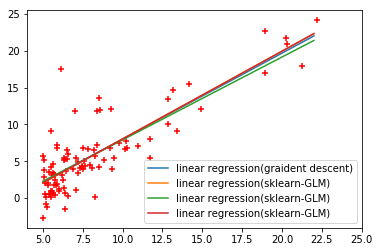

In [9]:
xx = np.arange(5,23)
yy = theta[0]+xx*theta[1]
plt.scatter(X[:,1],Y,s=30,c='r',marker='+',linewidths=1)
plt.xlim(4,25)
plt.plot(xx,yy,label = "linear regression(graident descent)")

print "linear regression(GD):",theta[0],theta[1]

lr = LinearRegression()
lr.fit(X[:,1].reshape(-1,1),Y.ravel())      # x: reshape(-1,1) w是1维的   Y: ravel() 降成1维， 用ravel() 可改，flatten() 不可改
print "linear regression sklearn-lr",lr.intercept_,lr.coef_
plt.plot(xx,lr.intercept_+xx*lr.coef_,label = "linear regression(sklearn-GLM)")

la = Lasso()
la.fit(X[:,1].reshape(-1,1),Y.ravel())
print "linear regression sklearn-Lasso",la.intercept_,la.coef_
plt.plot(xx,la.intercept_+xx*la.coef_,label = "linear regression(sklearn-GLM)")

ri = Ridge()
ri.fit(X[:,1].reshape(-1,1),Y.ravel())
print "linear regression sklearn-Ridge",ri.intercept_,ri.coef_
plt.plot(xx,ri.intercept_+xx*ri.coef_,label = "linear regression(sklearn-GLM)")
plt.legend(loc = "best")
plt.show()

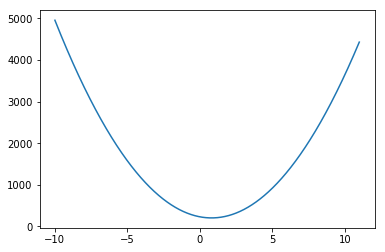

In [10]:
X2 = np.c_[data[:,0]]
theta2 = np.arange(-10,11,0.01)
n = Y.size
J = np.zeros(theta2.size)
Lambda = 0.5
for i in range(theta2.size):
    R = Lambda*1.0/(2*n)*np.sum(np.square(theta2))
    tmp = (1.0/(2*n))*np.sum(np.square(X2.dot(theta2[i])-Y))
    J[i] = tmp+R
plt.plot(theta2,J)
plt.show()

theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]


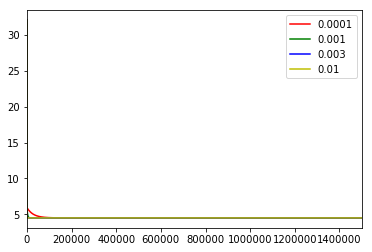

In [11]:
alphaArray = np.array([0.0001,0.001,0.003,0.01])   #从一个较小的a，比如0.001，然后每次增大3倍（0.003,0.01……）在训练集开始尝试
colors = np.array(['r','g','b','y'])
plt.xlim(0,1500000)

for i in np.arange(alphaArray.size):
    theta,loss = GradientDescent(X,Y,theta=[[0],[0]],LearningRate=alphaArray[i],num_iters=1500000)
    print "theta",theta.ravel()
    plt.plot(loss,c = colors[i],label = alphaArray[i])
plt.legend(loc="best")
plt.show()

theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]
theta [-3.89578088  1.19303364]


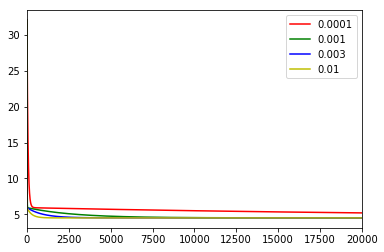

In [13]:
alphaArray = np.array([0.0001,0.001,0.003,0.01])   #观察大的学习率的效果
colors = np.array(['r','g','b','y'])
plt.xlim(0,20000)

for i in np.arange(alphaArray.size):
    theta,loss = GradientDescent(X,Y,theta=[[0],[0]],LearningRate=alphaArray[i],num_iters=1500000)
    print "theta",theta.ravel()
    plt.plot(loss,c = colors[i],label = alphaArray[i])
plt.legend(loc="best")
plt.show()

/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in square
/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/jackbai/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply


theta [ nan  nan]


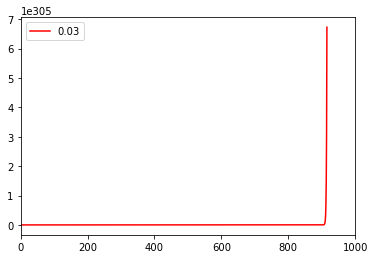

In [16]:
alphaArray = np.array([0.03])   #观察大的学习率的效果
colors = np.array(['r','g','b','y'])
plt.xlim(0,1000)

for i in np.arange(alphaArray.size):
    theta,loss = GradientDescent(X,Y,theta=[[0],[0]],LearningRate=alphaArray[i],num_iters=1500000)
    print "theta",theta.ravel()
    plt.plot(loss,c = colors[i],label = alphaArray[i])
plt.legend(loc="best")
plt.show()